* Dataset: [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset)

* Programming Language: Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Phần 3

### Đọc dữ liệu và gán vào biến `coronaData`

In [2]:
coronaData = pd.read_csv("data/covid_19_data.csv", index_col=0)

In [3]:
coronaData.describe().round(3)

,Confirmed,Deaths,Recovered
count,306429.000,306429.000,306429.000
mean,85670.912,2036.403,50420.286
std,277551.604,6410.938,201512.448
min,-302844.000,-178.000,-854405.000
25%,1042.000,13.000,11.000
50%,10375.000,192.000,1751.000
75%,50752.000,1322.000,20270.000
max,5863138.000,112385.000,6399531.000


In [4]:
coronaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  306429 non-null  object 
 1   Province/State   228329 non-null  object 
 2   Country/Region   306429 non-null  object 
 3   Last Update      306429 non-null  object 
 4   Confirmed        306429 non-null  float64
 5   Deaths           306429 non-null  float64
 6   Recovered        306429 non-null  float64
dtypes: float64(3), object(4)
memory usage: 18.7+ MB


### Liệt kê số cột, số hàng trong bảng dữ liệu

In [5]:
nrows, ncols = coronaData.shape
print(f"Số hàng: {nrows} hàng")
print(f"Số cột: {ncols} cột")

Số hàng: 306429 hàng
Số cột: 7 cột


### In ra 10 dòng đầu của bảng dữ liệu

In [6]:
coronaData.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


### In ra tên cột của dữ liệu

In [7]:
print(
    f"Các cột có trong bảng dữ liệu: {', '.join([column for column in coronaData.columns])}"
)

Các cột có trong bảng dữ liệu: ObservationDate, Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered


### Tạo biến `countryCorona` lưu giá trị là các quốc gia có dịch Corona

In [8]:
countryCorona = coronaData["Country/Region"].unique()
print(f"Số quốc gia có dịch Corona là: {len(countryCorona)}")

Số quốc gia có dịch Corona là: 229


### Liệt kê số lượng ca lây nhiễm được xác nhận (`Confirmed`) nhiều nhất và lưu vào biến `maxConfirmedCases`.

In [9]:
maxConfirmedCases = max(coronaData["Confirmed"])
print(f"maxConfirmedCases = {int(maxConfirmedCases)}")

maxConfirmedCases = 5863138


### Liệt kê các dữ liệu về covid-19 tại quốc gia `Mainland China` và lưu vào biến `coronaChina`

In [10]:
coronaChina = coronaData[coronaData["Country/Region"] == "Mainland China"]
coronaChina

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306341,05/29/2021,Tibet,Mainland China,2021-05-30 04:20:55,1.0,0.0,1.0
306369,05/29/2021,Unknown,Mainland China,2021-05-30 04:20:55,0.0,0.0,10.0
306413,05/29/2021,Xinjiang,Mainland China,2021-05-30 04:20:55,980.0,3.0,977.0


### Tìm `Country/Region` có số ca lây nhiễm nhiều nhất

In [11]:
maxCountryConfirmedCorona = coronaData[coronaData["Confirmed"] == maxConfirmedCases][
    "Country/Region"
].values[0]
print(
    f"Quốc gia có số ca lây nhiễm nhiều nhất: {maxCountryConfirmedCorona}"
)

Quốc gia có số ca lây nhiễm nhiều nhất: France


### Tìm `Province/State` có số ca lây nhiễm nhiều nhất

In [12]:
coronaData[coronaData["Confirmed"] == maxConfirmedCases]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
298069,05/19/2021,NaN,France,2021-05-20 04:21:05,5863138.0,107390.0,324444.0


In [13]:
maxStateConfirmedCorona = coronaData[coronaData["Confirmed"] == maxConfirmedCases][
    "Province/State"
]
print(
    f"Tỉnh có số ca lây nhiễm nhiều nhất: {maxStateConfirmedCorona.values[0]}"
)

Tỉnh có số ca lây nhiễm nhiều nhất: nan


### Lấy dữ liệu theo ngày tháng: Định dạng cột dữ liệu có ngày tháng

In [14]:
coronaData["ObservationDate"] = pd.to_datetime(coronaData["ObservationDate"])
coronaData["Last Update"] = pd.to_datetime(coronaData["Last Update"])

In [15]:
coronaData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306429 entries, 1 to 306429
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ObservationDate  306429 non-null  datetime64[ns]
 1   Province/State   228329 non-null  object        
 2   Country/Region   306429 non-null  object        
 3   Last Update      306429 non-null  datetime64[ns]
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 18.7+ MB


### Lấy dữ liệu trong tháng 1/2020

In [16]:
coronaData[(coronaData["ObservationDate"] >= "1-1-2020") & (coronaData["ObservationDate"] <= "1-31-2020")]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
509,2020-01-31,NaN,Philippines,2020-01-31 23:59:00,1.0,0.0,0.0
510,2020-01-31,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
511,2020-01-31,NaN,Sweden,2020-01-31 23:59:00,1.0,0.0,0.0


# Phần 4

### b) Tìm dữ liệu về số ca lây nhiễm tại `Vietnam` và lưu vào biến `coronaVietnam`.

In [17]:
coronaVietnam = coronaData[coronaData["Country/Region"] == "Vietnam"]
coronaVietnam

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
82,2020-01-23,NaN,Vietnam,2020-01-23 17:00:00,2.0,0.0,0.0
128,2020-01-24,NaN,Vietnam,2020-01-24 17:00:00,2.0,0.0,0.0
171,2020-01-25,NaN,Vietnam,2020-01-25 17:00:00,2.0,0.0,0.0
219,2020-01-26,NaN,Vietnam,2020-01-26 16:00:00,2.0,0.0,0.0
268,2020-01-27,NaN,Vietnam,2020-01-27 23:59:00,2.0,0.0,0.0
...,...,...,...,...,...,...,...
302772,2021-05-25,NaN,Vietnam,2021-05-26 04:20:35,5931.0,44.0,2794.0
303537,2021-05-26,NaN,Vietnam,2021-05-27 04:20:59,6086.0,45.0,2853.0
304302,2021-05-27,NaN,Vietnam,2021-05-28 04:20:36,6356.0,46.0,2853.0


### c) In ra số ca lây nhiễm nhiều nhất tại Việt Nam

In [18]:
print(
    f"Số ca lây nhiễm nhiều nhất tại Việt Nam là: {int(max(coronaVietnam['Confirmed']))}"
)

Số ca lây nhiễm nhiều nhất tại Việt Nam là: 6908


### d) Tìm dữ liệu về số ca lây nhiễm tại Việt Nam trong tháng 2 năm 2021

In [19]:
coronaVietNamFeb2021 = coronaVietnam[
    (coronaVietnam["ObservationDate"].dt.year == 2021)
    & (coronaVietnam["ObservationDate"].dt.month == 2)
]
coronaVietNamFeb2021

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
216327,2021-02-01,NaN,Vietnam,2021-04-02 15:13:53,1850.0,35.0,1460.0
217092,2021-02-02,NaN,Vietnam,2021-04-02 15:13:53,1882.0,35.0,1460.0
217857,2021-02-03,NaN,Vietnam,2021-04-02 15:13:53,1948.0,35.0,1461.0
218622,2021-02-04,NaN,Vietnam,2021-04-02 15:13:53,1957.0,35.0,1465.0
219387,2021-02-05,NaN,Vietnam,2021-04-02 15:13:53,1976.0,35.0,1465.0
220152,2021-02-06,NaN,Vietnam,2021-04-02 15:13:53,1985.0,35.0,1468.0
220917,2021-02-07,NaN,Vietnam,2021-04-02 15:13:53,2001.0,35.0,1472.0
221682,2021-02-08,NaN,Vietnam,2021-04-02 15:13:53,2050.0,35.0,1472.0
222447,2021-02-09,NaN,Vietnam,2021-04-02 15:13:53,2064.0,35.0,1472.0


### e) In ra số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Việt Nam (Lấy năm 2021).

In [20]:
corona_in12_atVietNam = coronaVietnam[
    (coronaVietnam["ObservationDate"] >= "1-1-2021")
    & (coronaVietnam["ObservationDate"] <= "2-28-2021")
]
max_confirmed_case_in12_atVietNam = max(corona_in12_atVietNam["Confirmed"])
print(
    f"Dữ liệu về số ca nhiễm nhiều nhất trong khoảng tháng 1 và 2 tại Việt Nam: {int(max_confirmed_case_in12_atVietNam)}"
)
corona_in12_atVietNam[corona_in12_atVietNam["Confirmed"] == max_confirmed_case_in12_atVietNam]

Dữ liệu về số ca nhiễm nhiều nhất trong khoảng tháng 1 và 2 tại Việt Nam: 2448


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
236982,2021-02-28,NaN,Vietnam,2021-04-02 15:13:53,2448.0,35.0,1876.0


### f.1) In ra số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Indonesia (Lấy năm 2021).

In [21]:
corona_in12_atIndonesia = coronaData[
    (coronaData["Country/Region"] == "Indonesia")
    & (coronaData["ObservationDate"] >= "1-1-2021")
    & (coronaData["ObservationDate"] <= "2-28-2021")
]
max_confirmed_case_in12_atIndonesia = max(corona_in12_atIndonesia["Confirmed"])
print(
    f"Dữ liệu về số ca nhiễm nhiều nhất trong khoảng tháng 1 và 2 tại Indonesia: {int(max_confirmed_case_in12_atIndonesia)}"
)
corona_in12_atIndonesia[corona_in12_atIndonesia["Confirmed"] == max_confirmed_case_in12_atIndonesia]

Dữ liệu về số ca nhiễm nhiều nhất trong khoảng tháng 1 và 2 tại Indonesia: 1334634


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
236885,2021-02-28,NaN,Indonesia,2021-04-02 15:13:53,1334634.0,36166.0,1142703.0


### f.2) In ra số dữ liệu về ca lây nhiễm nhiều nhất trong khoảng tháng 01 và 02 tại Philipine (Lấy năm 2021).

In [22]:
corona_in12_atPhilipine = coronaData[
    (coronaData["Country/Region"] == "Philippines")
    & (coronaData["ObservationDate"] >= "1-1-2021")
    & (coronaData["ObservationDate"] <= "2-28-2021")
]
max_confirmed_case_in12_atPhilipine = max(corona_in12_atPhilipine["Confirmed"])
print(
    f"Dữ liệu về số ca nhiễm nhiều nhất trong khoảng tháng 1 và 2 tại Philipine: {int(max_confirmed_case_in12_atPhilipine)}"
)
corona_in12_atPhilipine[corona_in12_atPhilipine["Confirmed"] == max_confirmed_case_in12_atPhilipine]

Dữ liệu về số ca nhiễm nhiều nhất trong khoảng tháng 1 và 2 tại Philipine: 576352


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
236937,2021-02-28,NaN,Philippines,2021-04-02 15:13:53,576352.0,12318.0,534271.0


### g) In ra dữ liệu về ca nhiễm ghi nhận `Confirmed` của Trung Quốc trong khoảng thời gian từ 01/02/2021 cho đến 15/02/2021.

In [23]:
coronaChina_half_Feb = coronaData[
    (coronaData["Country/Region"] == "Mainland China")
    & (coronaData["ObservationDate"] >= "2-1-2021")
    & (coronaData["ObservationDate"] <= "2-15-2021")
]
coronaChina_half_Feb

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
216354,2021-02-01,Anhui,Mainland China,2021-04-02 15:13:53,994.0,6.0,987.0
216388,2021-02-01,Beijing,Mainland China,2021-04-02 15:13:53,1039.0,9.0,977.0
216438,2021-02-01,Chongqing,Mainland China,2021-04-02 15:13:53,591.0,6.0,584.0
216480,2021-02-01,Fujian,Mainland China,2021-04-02 15:13:53,541.0,1.0,525.0
216485,2021-02-01,Gansu,Mainland China,2021-04-02 15:13:53,187.0,2.0,181.0
...,...,...,...,...,...,...,...
227546,2021-02-15,Tibet,Mainland China,2021-04-02 15:13:53,1.0,0.0,1.0
227574,2021-02-15,Unknown,Mainland China,2021-04-02 15:13:53,0.0,0.0,0.0
227618,2021-02-15,Xinjiang,Mainland China,2021-04-02 15:13:53,980.0,3.0,977.0


In [24]:
coronaChina_half_Feb["Confirmed"]

SNo
216354     994.0
216388    1039.0
216438     591.0
216480     541.0
216485     187.0
           ...  
227546       1.0
227574       0.0
227618     980.0
227626     231.0
227632    1320.0
Name: Confirmed, Length: 480, dtype: float64

### h) Thống kê số lượng record theo từng tỉnh của Trung Quốc trong tháng 02/2021.

In [25]:
h = coronaData[
    (
        (coronaData["Country/Region"] == "China")
        | (coronaData["Country/Region"] == "Mainland China")
    )
    & (
        (coronaData["ObservationDate"].dt.month == 2)
        & (coronaData["ObservationDate"].dt.year == 2021)
    )
]["Province/State"].value_counts()
h = h.reset_index()
h = h.rename(columns={"index": "Province/State", "Province/State": "Count"})
h

,Province/State,Count
0,Anhui,28
1,Beijing,28
2,Yunnan,28
3,Xinjiang,28
4,Unknown,28
5,Tibet,28
6,Tianjin,28
7,Sichuan,28
8,Shanxi,28
9,Shanghai,28


### i) Đếm số lượng ca nhiễm theo từng tỉnh của Trung Quốc trong tháng 02/2021.

In [26]:
def get_confirm_by_state(df):
    lastConfirmedInMonth = df[df["ObservationDate"] == df["ObservationDate"].max()]["Confirmed"].values[0]
    firstConfirmedInMonth = df[df["ObservationDate"] == df["ObservationDate"].min()]["Confirmed"].values[0]
    return lastConfirmedInMonth - firstConfirmedInMonth

In [27]:
China = coronaData[coronaData["Country/Region"] == "Mainland China"]
i = China.groupby(["Province/State"]).apply(get_confirm_by_state)
i = i.reset_index()
i = i.rename(columns={
    0: "conf_count",
})
i

,Province/State,conf_count
0,Anhui,1003.0
1,Beijing,1045.0
2,Chongqing,592.0
3,Fujian,619.0
4,Gansu,194.0
5,Guangdong,2406.0
6,Guangxi,273.0
7,Guizhou,146.0
8,Hainan,184.0
9,Hebei,1316.0


### k) Tìm dữ liệu ca tử vong của Trung Quốc trong khoảng thời gian từ 01/02/2021 cho đến 15/02/2021.

In [28]:
deathChinaJantoFeb = coronaData[
    (coronaData["Country/Region"] == "Mainland China")
    & (coronaData["ObservationDate"] >= "2-1-2021")
    & (coronaData["ObservationDate"] <= "2-15-2021")
]
deathChinaJantoFeb

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
216354,2021-02-01,Anhui,Mainland China,2021-04-02 15:13:53,994.0,6.0,987.0
216388,2021-02-01,Beijing,Mainland China,2021-04-02 15:13:53,1039.0,9.0,977.0
216438,2021-02-01,Chongqing,Mainland China,2021-04-02 15:13:53,591.0,6.0,584.0
216480,2021-02-01,Fujian,Mainland China,2021-04-02 15:13:53,541.0,1.0,525.0
216485,2021-02-01,Gansu,Mainland China,2021-04-02 15:13:53,187.0,2.0,181.0
...,...,...,...,...,...,...,...
227546,2021-02-15,Tibet,Mainland China,2021-04-02 15:13:53,1.0,0.0,1.0
227574,2021-02-15,Unknown,Mainland China,2021-04-02 15:13:53,0.0,0.0,0.0
227618,2021-02-15,Xinjiang,Mainland China,2021-04-02 15:13:53,980.0,3.0,977.0


In [29]:
deathChinaJantoFeb["Deaths"]

SNo
216354    6.0
216388    9.0
216438    6.0
216480    1.0
216485    2.0
         ... 
227546    0.0
227574    0.0
227618    3.0
227626    2.0
227632    1.0
Name: Deaths, Length: 480, dtype: float64

### l) Có nhận xét gì về số ca nhiễm mới tại Việt Nam giữa tháng 05/2020 và tháng 05/2021. Vẽ biểu đồ đường thể hiện số ca nhiễm mới trong 2 tháng trên.

In [30]:
vn_20 = coronaData[
    (coronaData["Country/Region"] == "Vietnam")
    & (coronaData["ObservationDate"].dt.month == 5)
    & (coronaData["ObservationDate"].dt.year == 2020)
]
vn_21 = coronaData[
    (coronaData["Country/Region"] == "Vietnam")
    & (coronaData["ObservationDate"].dt.month == 5)
    & (coronaData["ObservationDate"].dt.year == 2021)
]

In [31]:
vn_20["day"] = vn_20["ObservationDate"].dt.day
vn_20["year"] = vn_20["ObservationDate"].dt.year
vn_21["day"] = vn_21["ObservationDate"].dt.day
vn_21["year"] = vn_21["ObservationDate"].dt.year

/var/folders/82/pns0pt816_92_gy_53jnrh9r0000gn/T/ipykernel_15763/2427339240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_20["day"] = vn_20["ObservationDate"].dt.day
/var/folders/82/pns0pt816_92_gy_53jnrh9r0000gn/T/ipykernel_15763/2427339240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_20["year"] = vn_20["ObservationDate"].dt.year
/var/folders/82/pns0pt816_92_gy_53jnrh9r0000gn/T/ipykernel_15763/2427339240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

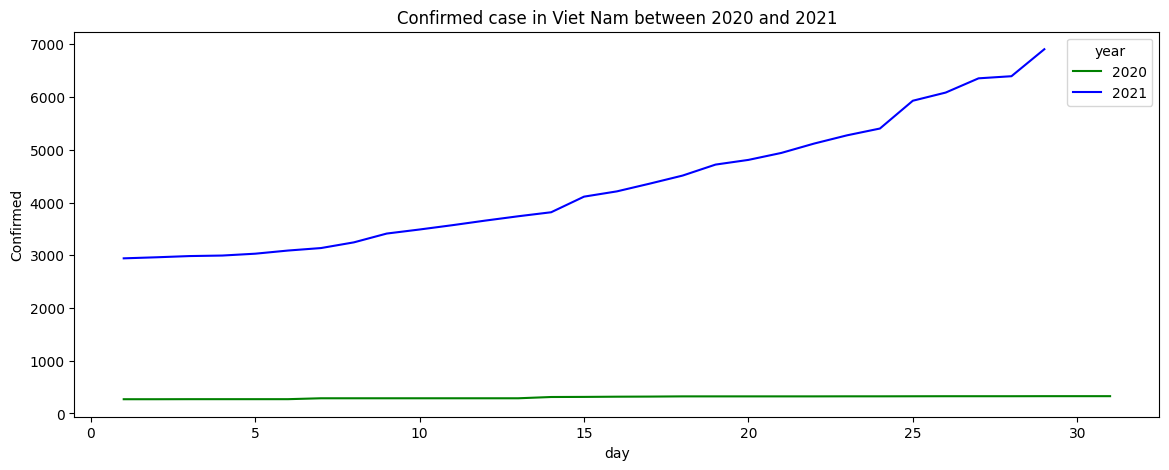

In [32]:
plt.figure(figsize=(14,5))
sns.lineplot(data=vn_20, x="day", y="Confirmed", hue="year", palette=['g'])
sns.lineplot(data=vn_21, x="day", y="Confirmed", hue="year", palette=['b'])
plt.title("Confirmed case in Viet Nam between 2020 and 2021")
plt.show()

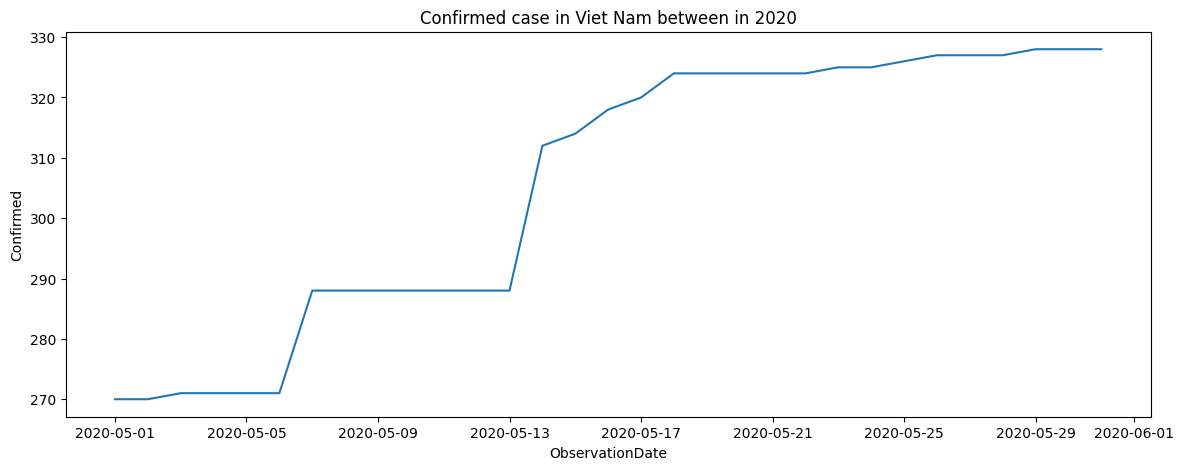

In [33]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=vn_20, x="ObservationDate", y="Confirmed")
plt.title("Confirmed case in Viet Nam between in 2020")
plt.show()

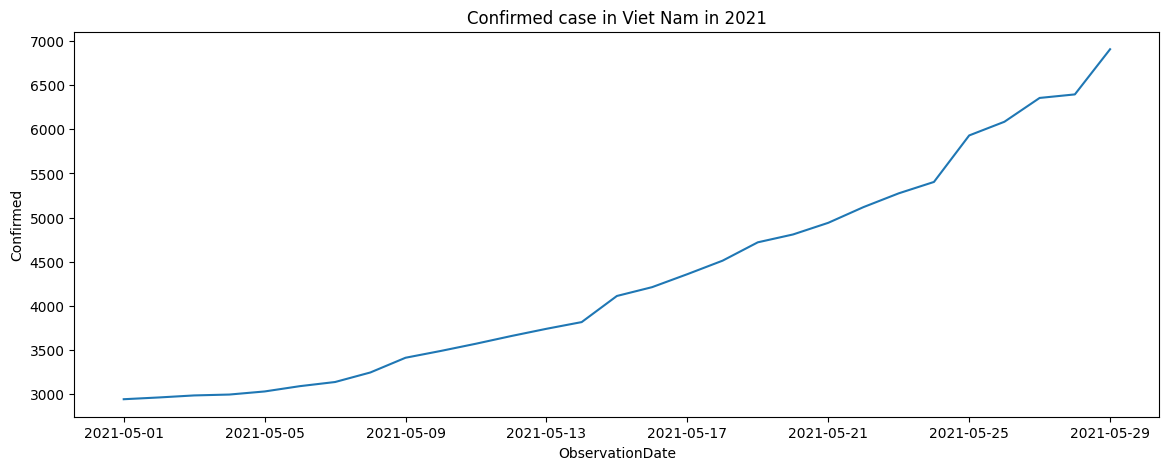

In [34]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=vn_21, x="ObservationDate", y="Confirmed")
plt.title("Confirmed case in Viet Nam in 2021")
plt.show()

#### Nhận xét: 

* Tháng 5 Năm 2020 số lượng ca nhiễm tăng một cách đột ngột vào nửa đầu tháng và tăng dần đều trong các ngày sau đó.

* Tháng 5 Năm 2021 số lượng ca nhiễm tăng dần đều trong các ngày.

* Số ca nhiễm của năm 2021 lớn hơn đáng kể so với năm 2021. Cụ thể cuối tháng 5, số ca nhiễm năm 2020 khoảng 330 nhưng đầu tháng 5 năm 2021 lại lên đến 3000.

### m) Vẽ biểu đồ về số ca lây nhiễm nhiều nhất của 3 quốc gia: Vietnam, Indonesia và Philippine trong 2 tháng gồm 01 và tháng 02 năm 2021.

In [35]:
Vi_Indo_Philip_Data = coronaData[
    (coronaData["Country/Region"].isin(["Vietnam", "Indonesia", "Philippines"]))
    & (coronaData["ObservationDate"].dt.month.isin([1, 2]))
    & (coronaData["ObservationDate"].dt.year == 2021)
]

In [36]:
m = Vi_Indo_Philip_Data.groupby(
    ["Country/Region", Vi_Indo_Philip_Data["ObservationDate"].dt.month], as_index=True
)["Confirmed"].max()
m = m.reset_index()
m = m.rename(columns={"ObservationDate": "Month"})
m

,Country/Region,Month,Confirmed
0,Indonesia,1,1078314.0
1,Indonesia,2,1334634.0
2,Philippines,1,525618.0
3,Philippines,2,576352.0
4,Vietnam,1,1817.0
5,Vietnam,2,2448.0


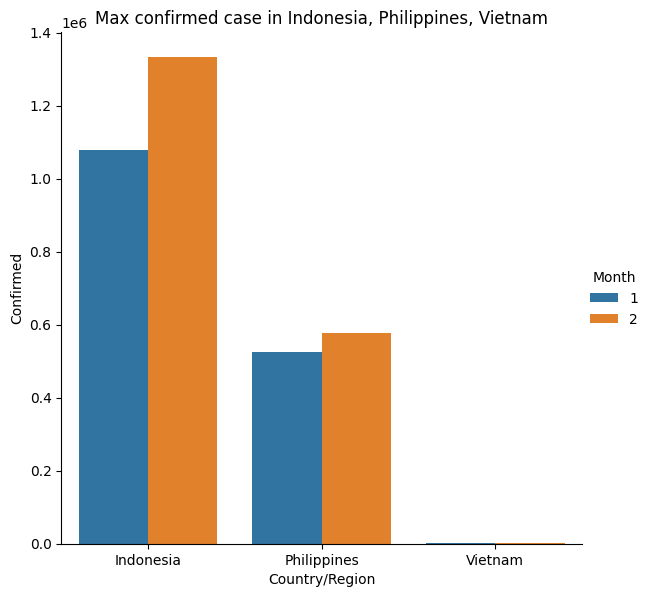

In [37]:
sns.catplot(
    data=m, kind="bar", x="Country/Region", y="Confirmed", hue="Month", height=6
)
plt.title("Max confirmed case in Indonesia, Philippines, Vietnam")
plt.show()

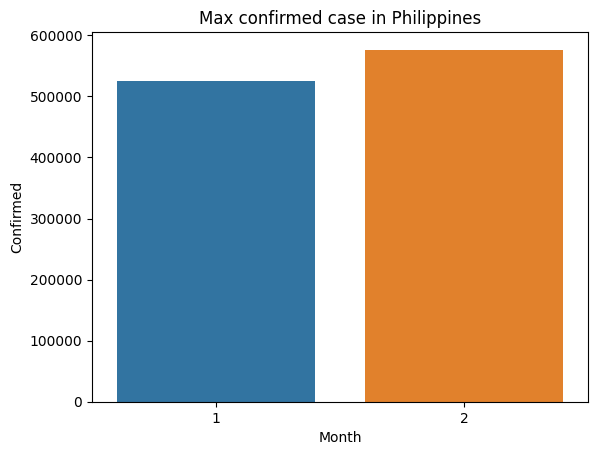

In [38]:
Philip = m[m["Country/Region"] == "Philippines"]
sns.barplot(data=Philip, x="Month", y="Confirmed")
plt.title("Max confirmed case in Philippines")
plt.show()

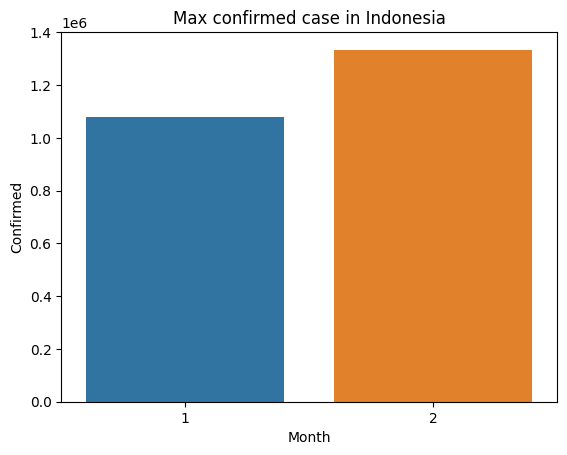

In [39]:
Indonesia = m[m["Country/Region"] == "Indonesia"]
sns.barplot(data=Indonesia, x="Month", y="Confirmed")
plt.title("Max confirmed case in Indonesia")
plt.show()

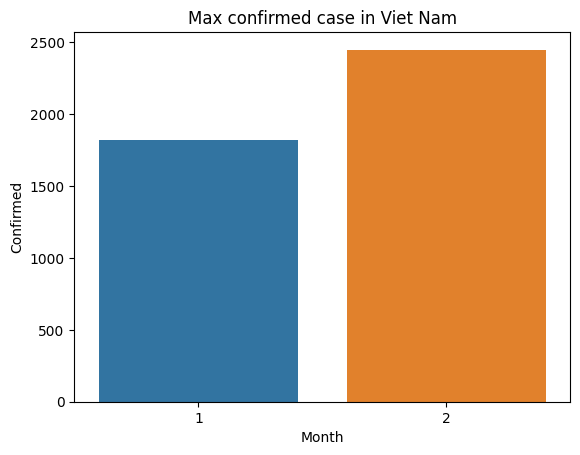

In [40]:
Vietnam = m[m["Country/Region"] == "Vietnam"]
sns.barplot(data=Vietnam, x="Month", y="Confirmed")
plt.title("Max confirmed case in Viet Nam")
plt.show()